In [4]:
import pandas as pd

# Load the datasets without parsing dates initially to inspect the column names
oil_data = pd.read_csv("../data/Copy of BrentOilPrices.csv")
gdp_data = pd.read_csv("../data/Countries GDP 1960-2020.csv")

# Display column names to check for discrepancies
print("Oil Data Columns:")
print(oil_data.columns)
print("\nGDP Data Columns:")
print(gdp_data.columns)


Oil Data Columns:
Index(['Date', 'Price'], dtype='object')

GDP Data Columns:
Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'],
      dtype='object')


Merge the Datasets

In [6]:
import pandas as pd

# Load the datasets
#oil_data = pd.read_csv("Copy of BrentOilPrices.csv", parse_dates=['Date'])
#gdp_data = pd.read_csv("Countries GDP 1960-2020.csv")

# Reshape the GDP data
gdp_long = gdp_data.melt(id_vars=['Country Name', 'Country Code'], 
                          var_name='Year', 
                          value_name='GDP')

# Convert the 'Year' column to datetime format
gdp_long['Year'] = pd.to_datetime(gdp_long['Year'], format='%Y')

# Check the first few rows of the reshaped GDP data
print("Reshaped GDP Data:")
print(gdp_long.head())

# Now merge the oil price data with the GDP data
# Extract the year from the oil data's Date
oil_data['Year'] = oil_data['Date'].dt.to_period('Y').dt.to_timestamp()

# Assuming you're interested in a specific country, let's say "Africa Eastern and Southern"
merged_data = pd.merge(oil_data, gdp_long[gdp_long['Country Name'] == 'Africa Eastern and Southern'], 
                        left_on='Year', right_on='Year', how='inner')

# Check the first few rows of the merged data
print("\nMerged Data:")
print(merged_data.head())


Reshaped GDP Data:
                  Country Name Country Code       Year           GDP
0  Africa Eastern and Southern          AFE 1960-01-01  1.931311e+10
1   Africa Western and Central          AFW 1960-01-01  1.040428e+10
2                    Australia          AUS 1960-01-01  1.860679e+10
3                      Austria          AUT 1960-01-01  6.592694e+09
4                      Burundi          BDI 1960-01-01  1.960000e+08


AttributeError: Can only use .dt accessor with datetimelike values

In [8]:
import pandas as pd

# Load the datasets
oil_data = pd.read_csv("../data/Copy of BrentOilPrices.csv", parse_dates=['Date'])
gdp_data = pd.read_csv("../data/Countries GDP 1960-2020.csv")

# Reshape the GDP data
gdp_long = gdp_data.melt(id_vars=['Country Name', 'Country Code'], 
                          var_name='Year', 
                          value_name='GDP')

# Convert the 'Year' column to datetime format and extract the year as int
gdp_long['Year'] = pd.to_datetime(gdp_long['Year'], format='%Y').dt.year

# Check the first few rows of the reshaped GDP data
print("Reshaped GDP Data:")
print(gdp_long.head())

# Check the dtypes of the oil data
print("\nOil Data Types:")
print(oil_data.dtypes)

# Ensure the 'Date' column is in datetime format
oil_data['Date'] = pd.to_datetime(oil_data['Date'])

# Extract the year from the oil data's Date
oil_data['Year'] = oil_data['Date'].dt.year

# Assuming you're interested in a specific country, let's say "Africa Eastern and Southern"
merged_data = pd.merge(oil_data, gdp_long[gdp_long['Country Name'] == 'Africa Eastern and Southern'], 
                        left_on='Year', right_on='Year', how='inner')

# Check the first few rows of the merged data
print("\nMerged Data:")
print(merged_data.head())


C:\Users\user\AppData\Local\Temp\ipykernel_24168\4132709843.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oil_data = pd.read_csv("../data/Copy of BrentOilPrices.csv", parse_dates=['Date'])


Reshaped GDP Data:
                  Country Name Country Code  Year           GDP
0  Africa Eastern and Southern          AFE  1960  1.931311e+10
1   Africa Western and Central          AFW  1960  1.040428e+10
2                    Australia          AUS  1960  1.860679e+10
3                      Austria          AUT  1960  6.592694e+09
4                      Burundi          BDI  1960  1.960000e+08

Oil Data Types:
Date     datetime64[ns]
Price           float64
dtype: object

Merged Data:
        Date  Price  Year                 Country Name Country Code  \
0 1987-05-20  18.63  1987  Africa Eastern and Southern          AFE   
1 1987-05-21  18.45  1987  Africa Eastern and Southern          AFE   
2 1987-05-22  18.55  1987  Africa Eastern and Southern          AFE   
3 1987-05-25  18.60  1987  Africa Eastern and Southern          AFE   
4 1987-05-26  18.63  1987  Africa Eastern and Southern          AFE   

            GDP  
0  1.800000e+11  
1  1.800000e+11  
2  1.800000e+11  
3  1.

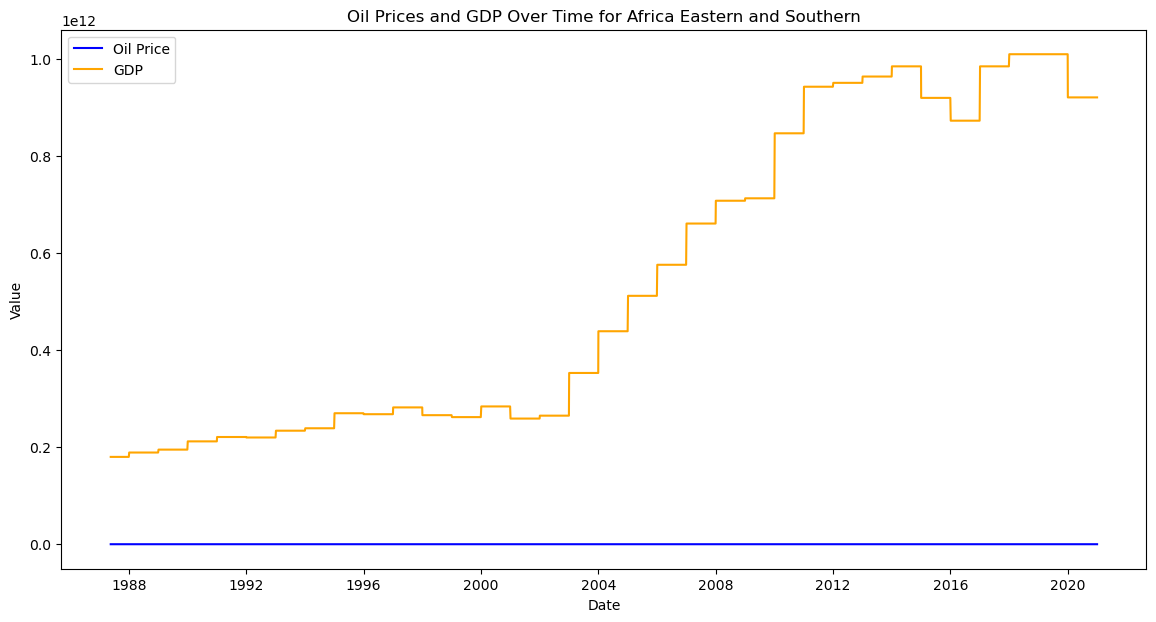

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_data, x='Date', y='Price', label='Oil Price', color='blue')
sns.lineplot(data=merged_data, x='Date', y='GDP', label='GDP', color='orange')
plt.title('Oil Prices and GDP Over Time for Africa Eastern and Southern')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [10]:
merged_data.to_csv("../data/merged_oil_gdp_data.csv", index=False)


Basic Data Inspection

In [11]:
# Check the shape of the merged data
print("Shape of merged data:", merged_data.shape)

# Display data types
print("\nData Types:")
print(merged_data.dtypes)

# Check for null values
print("\nMissing Values:")
print(merged_data.isnull().sum())


Shape of merged data: (8538, 6)

Data Types:
Date            datetime64[ns]
Price                  float64
Year                     int32
Country Name            object
Country Code            object
GDP                    float64
dtype: object

Missing Values:
Date            0
Price           0
Year            0
Country Name    0
Country Code    0
GDP             0
dtype: int64


Statistical Summary

In [12]:
# Display summary statistics
print("\nSummary Statistics:")
print(merged_data.describe())



Summary Statistics:
                                Date        Price         Year           GDP
count                           8538  8538.000000  8538.000000  8.538000e+03
mean   2004-03-07 14:17:27.364722304    46.337340  2003.678379  5.392149e+11
min              1987-05-20 00:00:00     9.100000  1987.000000  1.800000e+11
25%              1995-10-03 06:00:00    18.850000  1995.000000  2.590000e+11
50%              2004-03-06 12:00:00    33.200000  2004.000000  4.390000e+11
75%              2012-08-13 18:00:00    66.320000  2012.000000  9.200000e+11
max              2020-12-31 00:00:00   143.950000  2020.000000  1.010000e+12
std                              NaN    32.193328     9.720426  3.164354e+11


Time Series Analysis
Visualize the trends of GDP and oil prices over time.

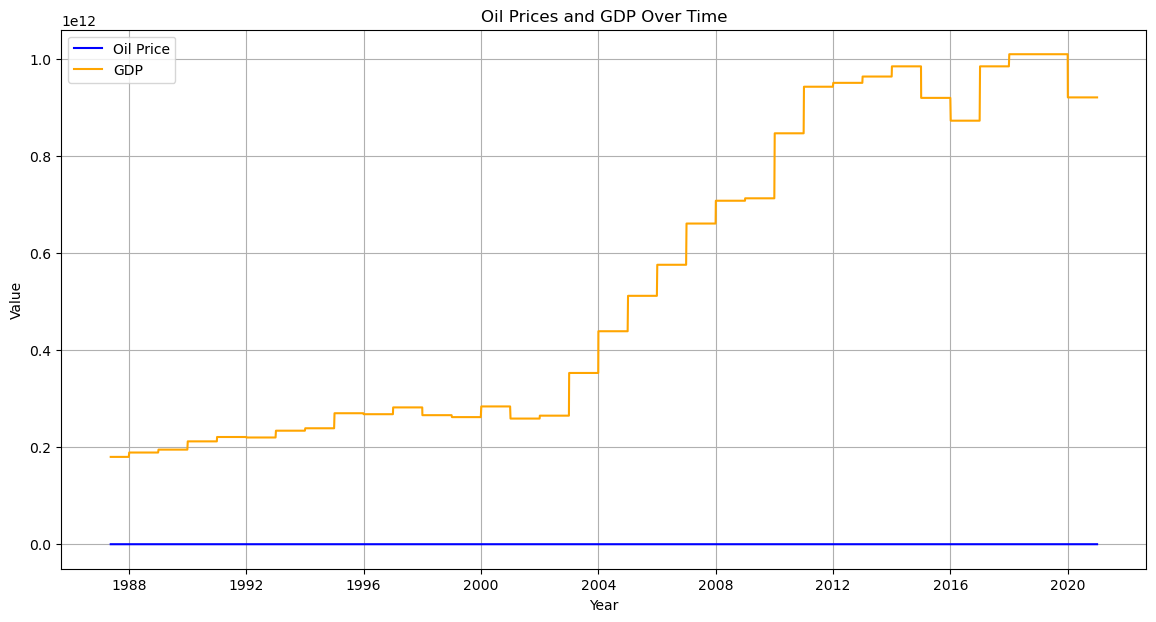

In [13]:
# Convert 'Date' to datetime if not already
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Set 'Date' as the index
merged_data.set_index('Date', inplace=True)

# Plotting GDP and Oil Prices over time
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Price'], label='Oil Price', color='blue')
plt.plot(merged_data['GDP'], label='GDP', color='orange')
plt.title('Oil Prices and GDP Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


Time Series Plot of Oil Prices and GDP

In [14]:
# Convert 'Date' to datetime if not already
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Set 'Date' as the index
merged_data.set_index('Date', inplace=True)

# Plotting GDP and Oil Prices over time
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Price'], label='Oil Price', color='blue')
plt.plot(merged_data['GDP'], label='GDP', color='orange')
plt.title('Oil Prices and GDP Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


KeyError: 'Date'

In [15]:
# Print the current columns of merged_data
print(merged_data.columns)


Index(['Price', 'Year', 'Country Name', 'Country Code', 'GDP'], dtype='object')


In [16]:
print("GDP Data Columns:", gdp_data.columns)
print("Oil Price Data Columns:", oil_data.columns)


GDP Data Columns: Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'],
      dtype='object')
Oil Price Data Columns: Index(['Date', 'Price', 'Year'], dtype='object')


In [18]:
import pandas as pd

# Load your datasets
gdp_data = pd.read_csv("../data/gdp_data.csv")  # Adjust path as necessary
oil_data = pd.read_csv("../data/Copy of BrentOilPrices.csv", parse_dates=['Date'])

# Reshape GDP Data from wide to long format
gdp_long = gdp_data.melt(id_vars=['Country Name', 'Country Code'], 
                          var_name='Year', 
                          value_name='GDP')

# Convert 'Year' to int
gdp_long['Year'] = gdp_long['Year'].astype(int)

# Check the reshaped GDP Data
print("Reshaped GDP Data:")
print(gdp_long.head())

# Merge with oil data
merged_data = pd.merge(oil_data, gdp_long, on=['Year', 'Country Name', 'Country Code'], how='left')

# Now, 'Date' should be present in the merged DataFrame
print("Merged Data Columns:", merged_data.columns)

# If you want to set 'Date' as the index and ensure it's in datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data.set_index('Date', inplace=True)

# Check the merged Data
print("Merged Data:")
print(merged_data.head())


FileNotFoundError: [Errno 2] No such file or directory: '../data/gdp_data.csv'